In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker

In [3]:
iso_sim = pd.read_csv('../data/bigo.csv')
iso_sim

,seq_len,iso_count,n_dons,n_accs,time
0,300,0,1,4,0.000015
1,300,0,1,6,0.000012
2,300,0,3,1,0.000011
3,300,0,4,1,0.000010
4,300,0,3,2,0.000010
...,...,...,...,...,...
1896,1200,3143083259,54,46,3402.269098
1897,1200,10550340359,52,52,15370.186402
1898,1200,10709534879,48,50,10133.434150
1899,1200,7202967391,51,53,8882.911350


<Axes: title={'center': 'iso_count'}, xlabel='seq_len'>

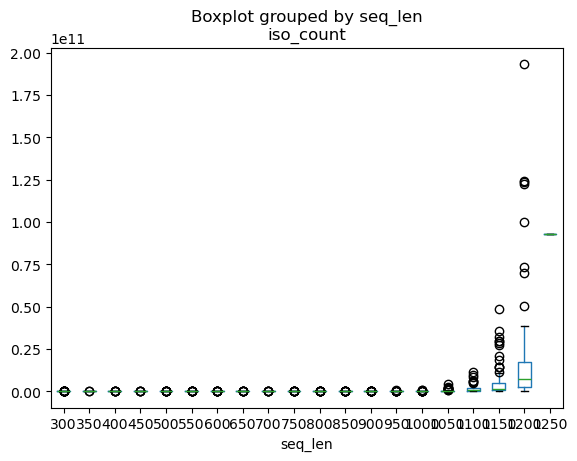

In [4]:
iso_sim.boxplot(by = 'seq_len', column = ['iso_count'], grid = False)

<Axes: title={'center': 'iso_count'}, xlabel='time'>

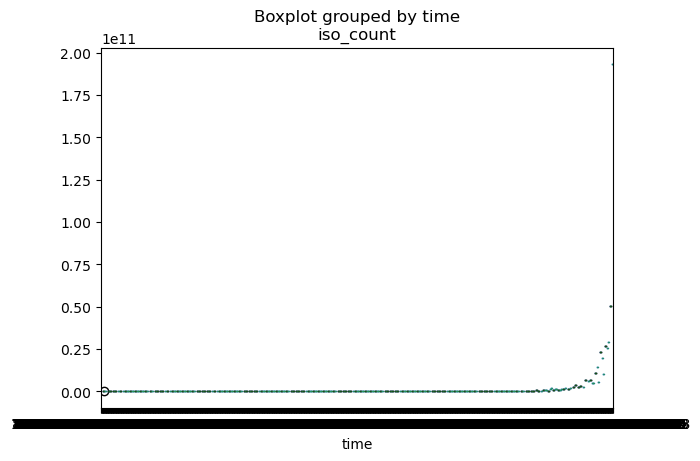

In [5]:
iso_sim.boxplot(by = 'time', column = ['iso_count'], grid = False)

In [18]:
pwm20 = pd.read_csv('sg_rnaseq_pwm_20bp.csv', header=None)
pwm20.head(10)

,0,1,2,3,4
0,smallgenes_rnaseq_relative_donpwm,0.032819,0.014615,0.014838,0.026514
1,smallgenes_rnaseq_relative_donpwm,0.019318,0.009823,0.010735,0.013278
2,smallgenes_rnaseq_relative_donpwm,0.038890,0.024539,0.018565,0.014966
3,smallgenes_rnaseq_relative_donpwm,0.143828,0.038324,0.031651,0.060549
4,smallgenes_rnaseq_relative_donpwm,0.069109,0.033438,0.244270,0.063508
5,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,2.000000,0.000000
6,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,0.000000,2.000000
7,smallgenes_rnaseq_relative_donpwm,0.364980,0.008178,0.122333,0.095131
8,smallgenes_rnaseq_relative_donpwm,0.517074,0.041288,0.053633,0.111615
9,smallgenes_rnaseq_relative_donpwm,0.075285,0.026691,0.704060,0.103733


In [19]:
pwm20_don = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_donpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_don.head(5)

,A,C,G,T
0,0.032819,0.014615,0.014838,0.026514
1,0.019318,0.009823,0.010735,0.013278
2,0.038890,0.024539,0.018565,0.014966
3,0.143828,0.038324,0.031651,0.060549
4,0.069109,0.033438,0.244270,0.063508


In [20]:
pwm20_acc = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_accpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_acc.head(5)

,A,C,G,T
20,0.142444,0.043767,0.019292,0.100835
21,0.080952,0.033386,0.019210,0.086678
22,0.077257,0.032734,0.021609,0.100955
23,0.064045,0.027519,0.020824,0.077475
24,0.073747,0.031291,0.020163,0.086534


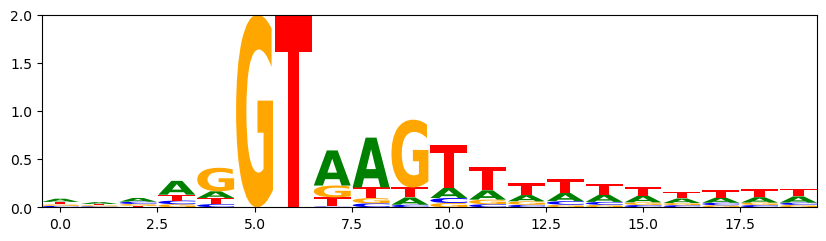

In [21]:
don20_logo = logomaker.Logo(pwm20_don, shade_below=.5, fade_below=.5)

This pwm suggests the donor site should include 2 base pairs upstream, into the exon sequence. The main donor site should also be 7 base pairs long. Suggested donor site motif would be AGGTAAGTT.

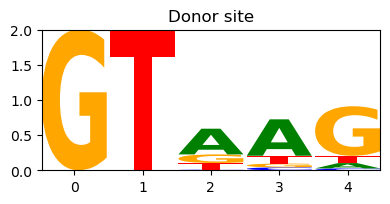

In [28]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

don5_pwm = pwm20_don[5:10].reset_index(drop=True)
don5_logo = logomaker.Logo(don5_pwm, ax=ax, shade_below=.5, fade_below=.5)

don5_logo.fig.tight_layout()
plt.title('Donor site')
plt.show
plt.savefig('don5pwm.svg', format='svg')

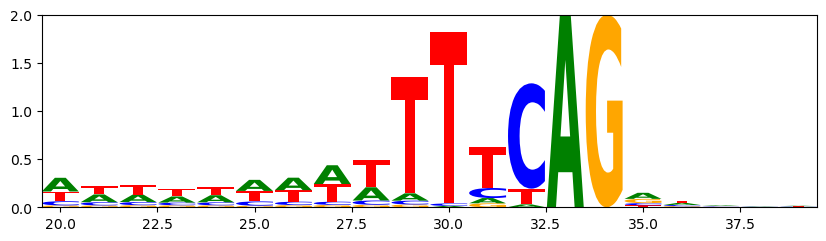

In [23]:
pwm20_acc_plt = logomaker.Logo(pwm20_acc, shade_below=.5, fade_below=.5)

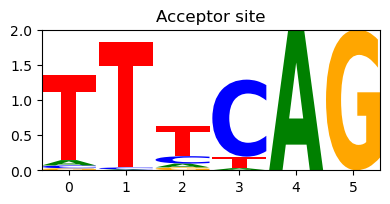

In [29]:
fig, ax = plt.subplots(1,1,figsize=[4,2])

acc5_pwm = pwm20_acc[9:15].reset_index(drop=True)
acc5_logo = logomaker.Logo(acc5_pwm, ax=ax, shade_below=.5, fade_below=.5)

acc5_logo.fig.tight_layout()
plt.title('Acceptor site')
plt.show
plt.savefig('acc6pwm.svg', format='svg')

This pwm suggests the acceptor site should be 8 base pairs long, with a top scoring motif being ATTTTCAG.

In [ ]:
dists = pd.read_csv('apc_distances_original.csv')
# need to use .copy() to create new object, not a temporary object
# https://towardsdatascience.com/pandas-from-messy-to-beautiful-b03b0c32f767/
dists

In [ ]:
dists.loc[:, 'base_to_opt_nmd'] = dists['apc_optiso_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_nmd'] = dists['apc_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_opt'] = dists['apc_optiso'] - dists['apc_base']

In [ ]:
dists.sort_values(by='apc_base', ascending=True)
pd.set_option('display.max_rows', 20)
#dists

In [ ]:
dists.sort_values(by='base_to_opt_nmd', ascending=True)

Some genes get worse the more optimizations you add. Let's look at gene 2.230.

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dists, color='blue', x='apc_base')
sns.histplot(data=dists, color='red', x='apc_nmd')
sns.histplot(data=dists, color='green', x='apc_optiso')
sns.histplot(data=dists, color='yellow', x='apc_optiso_nmd')
plt.show()

In [ ]:
base_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_base'])
nmd_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_nmd'])
optiso_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_optiso'])
optiso_nmd_vals = pd.melt(dists, id_vars=['gene_id'], value_vars=['apc_optiso_nmd'])

In [ ]:
vert_df = pd.concat([base_vals, nmd_vals, optiso_vals, optiso_nmd_vals], axis=0)
vert_df

In [ ]:
sns.histplot(data=vert_df, x='value', hue='variable', multiple='dodge', kde=True)

In [ ]:
# check trends for up2


In [ ]:
# ranks genes by biggest improvements to distance

In [ ]:
# plot exon/intron length model for export into apc.svg
elen = pd.read_csv('../data/models/exon.len')
elen = elen.rename(columns={elen.columns[0]: 'Probability'})
elen.loc[:, 'Length'] = elen.index
elen

In [ ]:
ilen = pd.read_csv('../data/models/intron.len')
ilen = ilen.rename(columns={ilen.columns[0]: 'Probability'})
ilen.loc[:, 'Length'] = ilen.index
ilen

In [ ]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=elen, x='Length', y='Probability').set(title='Exon length model')
plt.tight_layout()
plt.savefig('elen.svg', format='svg')

In [ ]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=ilen, x='Length', y='Probability', color='red').set(title='Intron length model')
plt.tight_layout()
plt.savefig('ilen.svg', format='svg')

In [ ]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=elen, x='Length', y='Probability')
sns.lineplot(data=ilen, x='Length', y='Probability', color='red')
plt.tight_layout()